<!-- # ![H1NI VACCINE UPTAKE ANALYSIS AND PREDICTION](apple-hardware-vs-google-hardware.webp) -->

## APPLE AND GOOGLE PRODUCTS TWITTER SENTIMENT ANALYSIS

# ![H1NI VACCINE UPTAKE ANALYSIS AND PREDICTION](GvsA.jpg)

Final Project Submission Please fill out:

Student names: Annah Mukethe

Student pace: Part Time

Scheduled project review date/time: PHASE 4

Instructor name: Samuel Karu

## PROJECT OVERVIEW

In this project, we aim to build a Natural Language Processing (NLP) model to analyze the sentiment of tweets related to Apple and Google products. By understanding customer sentiment from social media, companies can better strategize product development, marketing, and customer service. The model will classify the sentiment (e.g., positive, negative, neutral) of tweets mentioning Apple and Google products.

## BUSINESS UNDERSTANDING

**BUSINESS PROBLEM**

Tech companies like Apple and Google rely heavily on customer feedback for product improvements and market positioning. Sentiment analysis of social media data provides valuable insights into how consumers feel about these companies' products. The main business problem is understanding public opinion in real-time and at scale to guide strategic decisions.

**OBJECTIVES**

Preprocessing: Clean and preprocess the raw text data to prepare it for model training.

Sentiment Analysis: Build and train machine learning models to classify sentiment.

Evaluation: Evaluate the models' performance using metrics such as accuracy, precision, recall, and F1-score.


## DATA UNDERSTANDING ##

**IMPORTING LIBRARIES**

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import chardet

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Annah.Mukethe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Annah.Mukethe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Annah.Mukethe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Annah.Mukethe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**LOADING THE DATA**

In [11]:
import csv
def detect_encoding(file_path):
    with open(file_path, 'rb') as file:
        raw_data = file.read()
    return chardet.detect(raw_data)['encoding']

file_path = 'tweet_product_company.csv'
detected_encoding = detect_encoding(file_path)
print(f"Detected encoding: {detected_encoding}")

try:
    with open(file_path, 'r', encoding=detected_encoding, newline='') as file:
        csv_reader = csv.reader(file)
        header = next(csv_reader)
        data = list(csv_reader)

except UnicodeDecodeError:
    print(f"Failed to read with {detected_encoding}. Trying with 'ISO-8859-1'...")
    with open(file_path, 'r', encoding='ISO-8859-1', newline='') as file:
        csv_reader = csv.reader(file)
        header = next(csv_reader)
        data = list(csv_reader)

df = pd.DataFrame(data, columns=header)

print("Data loaded successfully. Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head())

# Ensure the column names are stripped of any whitespace
df.columns = df.columns.str.strip()

# Now you can access the 'tweet_text' column
print("\nFirst few tweet texts:")
print(df['tweet_text'].head())

Detected encoding: MacRoman
Data loaded successfully. Shape: (9093, 3)

Columns: ['tweet_text', 'emotion_in_tweet_is_directed_at', 'is_there_an_emotion_directed_at_a_brand_or_product']

First few rows:
                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                 

##  DATA INSPECTION ##

In [12]:
# Check for missing values and data types
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9093 non-null   object
 1   emotion_in_tweet_is_directed_at                     9093 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None


From the output above, we observe that, the dataset contains **9093 rows** and **3 columns**.
- The columns are:
  1. `tweet_text` – the content of the tweet (no missing values).
  2. `emotion_in_tweet_is_directed_at` – the entity/emotion the tweet is directed at (128 missing values).
  3. `is_there_an_emotion_directed_at_a_brand_or_product` – sentiment towards a brand or product (161 missing values).
  
- All columns are of the `object` type, which is typical for text data.

In [13]:

# Summary statistics
print("\nSummary statistics:")
print(df.describe())




Summary statistics:
                                               tweet_text  \
count                                                9093   
unique                                               9066   
top     RT @mention Marissa Mayer: Google Will Connect...   
freq                                                    5   

       emotion_in_tweet_is_directed_at  \
count                             9093   
unique                              10   
top                                      
freq                              5802   

       is_there_an_emotion_directed_at_a_brand_or_product  
count                                                9093  
unique                                                  4  
top                    No emotion toward brand or product  
freq                                                 5389  


#### Summary Statistics

- The `tweet_text` column has **9093 entries** with **9066 unique tweets**. 
  - The most frequent tweet appears **5 times**.
- The `emotion_in_tweet_is_directed_at` column has **10 unique values**. 
  - Interestingly, the most frequent value is **blank**, appearing **5802 times**, indicating many tweets may not be directed at a specific entity or emotion.
- The `is_there_an_emotion_directed_at_a_brand_or_product` column has **4 unique values**.
  - The most frequent value is **"No emotion toward brand or product"**, appearing **5389 times**, which indicates a large portion of tweets may not express strong emotions toward brands.

**Key Observations**:
- There is likely noise in the dataset, particularly in the target columns (`emotion_in_tweet_is_directed_at` and `is_there_an_emotion_directed_at_a_brand_or_product`). The most frequent value is either empty or shows no emotion towards the brand, which needs to be considered during preprocessing.


In [14]:
# Check for any missing values
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64


#### Missing Values

No missing values in our dataset


In [15]:
# Check the distribution of the target column
if 'is_there_an_emotion_directed_at_a_brand_or_product' in df.columns:
    print("\nSentiment distribution:")
    print(df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts())


Sentiment distribution:
is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64


#### Target Variable Distribution (`is_there_an_emotion_directed_at_a_brand_or_product`)

- The most frequent label is **"No emotion toward brand or product"** (5389 occurrences), followed by **"Positive emotion"** (2978 occurrences), followed by **"Negative emotion"** (570 occurrences) and lastly **"I can't tell"** (156 occurances).

**Next Steps**:
- We will need to clean the target variable by removing or consolidating values with product names embedded in them.
- This will ensure that the sentiment is represented clearly, without any product-specific noise.


## DATA PREPROCESSING ##

**SIMPLE PREPROCESSING**

In [16]:
# Remove unnecessary whitespace from column names
df.columns = df.columns.str.strip()

# Display the cleaned dataframe shape and check missing values
print("Data shape after dropping missing tweet_text rows:", df.shape)
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Data shape after dropping missing tweet_text rows: (9093, 3)

Missing values after cleaning:
tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64


#### Simple Preprocessing Summary

- We stripped any unnecessary whitespace from the column names.

Next, we will clean the text data and prepare the target variable for model training.


##  **TEXT PREPROCESSING**

In this step, we will clean the tweet_text column by:

Removing unnecessary elements such as:

URLs

Mentions (@rname)

Hashtags (#)

Special characters, digits, and extra spaces

Converting all text to lowercase to standardize the data.

Tokenizing the text and removing common stopwords (words that don't carry much meaning like "the", "and", etc.).

In [17]:
# Function to clean text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Remove special characters, digits, and extra spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Convert to lowercase
    text = text.lower()
    
    return text

# Apply the cleaning function to the tweet_text column
df['cleaned_text'] = df['tweet_text'].apply(clean_text)

# Display the first few cleaned tweets
print("\nFirst few cleaned tweet texts:")
print(df['cleaned_text'].head())


# Print the shape of the dataframe
print("\nDataframe shape:", df.shape)


First few cleaned tweet texts:
0    i have a g iphone after hrs tweeting at it was...
1    know about awesome ipadiphone app that youll l...
2    can not wait for also they should sale them do...
3    i hope this years festival isnt as crashy as t...
4    great stuff on fri marissa mayer google tim or...
Name: cleaned_text, dtype: object

Dataframe shape: (9093, 4)


#### Text Preprocessing: Cleaning Tweets

- We removed URLs, mentions (@username), and hashtags from the tweet text.
- Special characters, digits, and extra spaces were eliminated.
- All text was converted to lowercase to standardize the data.

Below is a sample of the cleaned tweet texts:
know about awesome ipadiphone app that youll

## OTHER COLUMNS

In [18]:
# Clean the 'emotion_in_tweet_is_directed_at' column
df['emotion_in_tweet_is_directed_at'] = df['emotion_in_tweet_is_directed_at'].str.lower().str.strip()


# Standardizing the values in the target column
df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].str.lower().str.strip()

# Display unique values of the target column to inspect the current state
print("Unique values in the 'is_there_an_emotion_directed_at_a_brand_or_product' column:")
print(df['is_there_an_emotion_directed_at_a_brand_or_product'].unique())

Unique values in the 'is_there_an_emotion_directed_at_a_brand_or_product' column:
['negative emotion' 'positive emotion'
 'no emotion toward brand or product' "i can't tell"]


In [19]:
# Display unique values of the target column to inspect the current state
print("Unique values in the 'emotion_in_tweet_is_directed_at' column:")
print(df['emotion_in_tweet_is_directed_at'].unique())

Unique values in the 'emotion_in_tweet_is_directed_at' column:
['iphone' 'ipad or iphone app' 'ipad' 'google' '' 'android' 'apple'
 'android app' 'other google product or service'
 'other apple product or service']


In [20]:
print(df.head(15))

                                           tweet_text  \
0   .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1   @jessedee Know about @fludapp ? Awesome iPad/i...   
2   @swonderlin Can not wait for #iPad 2 also. The...   
3   @sxsw I hope this year's festival isn't as cra...   
4   @sxtxstate great stuff on Fri #SXSW: Marissa M...   
5   @teachntech00 New iPad Apps For #SpeechTherapy...   
6                                                       
7   #SXSW is just starting, #CTIA is around the co...   
8   Beautifully smart and simple idea RT @madebyma...   
9   Counting down the days to #sxsw plus strong Ca...   
10  Excited to meet the @samsungmobileus at #sxsw ...   
11  Find &amp; Start Impromptu Parties at #SXSW Wi...   
12  Foursquare ups the game, just in time for #SXS...   
13  Gotta love this #SXSW Google Calendar featurin...   
14  Great #sxsw ipad app from @madebymany: http://...   

    emotion_in_tweet_is_directed_at  \
0                            iphone   
1        

In [21]:
# Check for blank values in 'emotion_in_tweet_is_directed_at'
print(f"Before cleaning, unique values: {df['emotion_in_tweet_is_directed_at'].unique()}")

# Replace empty strings with 'Unknown'
df['emotion_in_tweet_is_directed_at'] = df['emotion_in_tweet_is_directed_at'].replace('', 'Unknown')

# Verify that the replacement has been applied
print(f"After cleaning, unique values: {df['emotion_in_tweet_is_directed_at'].unique()}")



Before cleaning, unique values: ['iphone' 'ipad or iphone app' 'ipad' 'google' '' 'android' 'apple'
 'android app' 'other google product or service'
 'other apple product or service']
After cleaning, unique values: ['iphone' 'ipad or iphone app' 'ipad' 'google' 'Unknown' 'android' 'apple'
 'android app' 'other google product or service'
 'other apple product or service']


In [22]:
print(df.head())

                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iphone   
1              ipad or iphone app   
2                            ipad   
3              ipad or iphone app   
4                          google   

  is_there_an_emotion_directed_at_a_brand_or_product  \
0                                   negative emotion   
1                                   positive emotion   
2                                   positive emotion   
3                                   negative emotion   
4                                   positive emotion   

                                        cleaned_text  
0  i have a g iphone after hrs tweeting at it wa

## STEP 3: TOKENIZATION, STOPWORD REMOVAL AND LEMITIZATION

Tokenization
Removing stop words
Lemmatization

In [23]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def advanced_preprocess(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stop words and lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    return ' '.join(cleaned_tokens)

# Apply advanced preprocessing to the 'cleaned_text' column
df['preprocessed_text'] = df['cleaned_text'].apply(advanced_preprocess)

# Display the first few rows of the preprocessed text
print(df[['tweet_text', 'cleaned_text', 'preprocessed_text']].head())

# Print the shape of the dataframe
print("\nDataframe shape:", df.shape)

# Get some statistics about the text length
df['text_length'] = df['preprocessed_text'].apply(len)
print("\nPreprocessed text length statistics:")
print(df['text_length'].describe())


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Annah.Mukethe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

                                        cleaned_text  \
0  i have a g iphone after hrs tweeting at it was...   
1  know about awesome ipadiphone app that youll l...   
2  can not wait for also they should sale them do...   
3  i hope this years festival isnt as crashy as t...   
4  great stuff on fri marissa mayer google tim or...   

                                   preprocessed_text  
0  g iphone hr tweeting dead need upgrade plugin ...  
1  know awesome ipadiphone app youll likely appre...  
2                                     wait also sale  
3     hope year festival isnt crashy year iphone app  
4  great stuff fri marissa mayer google tim oreil..

In [25]:
# Create a new 'Product' column
def map_to_product(text):
    if pd.isna(text) or text == '':
        return 'Unknown'
    elif any(keyword in text.lower() for keyword in ['iphone', 'ipad', 'apple']):
        return 'Apple'
    elif any(keyword in text.lower() for keyword in ['android', 'google']):
        return 'Google'
    else:
        return 'Other'

df['Product'] = df['emotion_in_tweet_is_directed_at'].apply(map_to_product)

# Create a contingency table
contingency_table = pd.crosstab(df['Product'], df['is_there_an_emotion_directed_at_a_brand_or_product'])

# Calculate percentages
contingency_table_percent = contingency_table.div(contingency_table.sum(axis=1), axis=0)

## VISUALIZATION

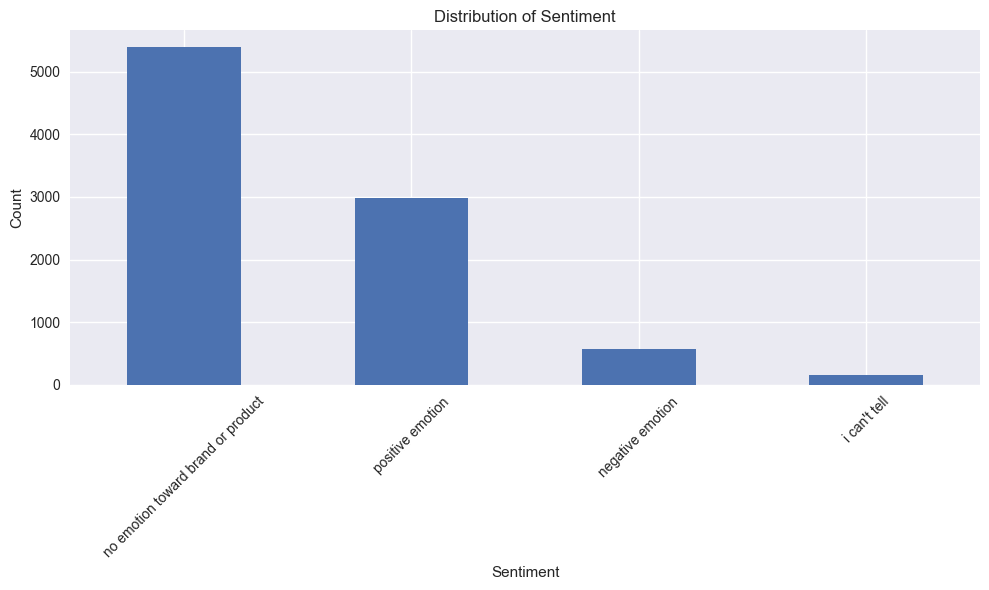

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set style for better-looking plots
plt.style.use('seaborn')

# 1. Distribution of sentiment
plt.figure(figsize=(10, 6))
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

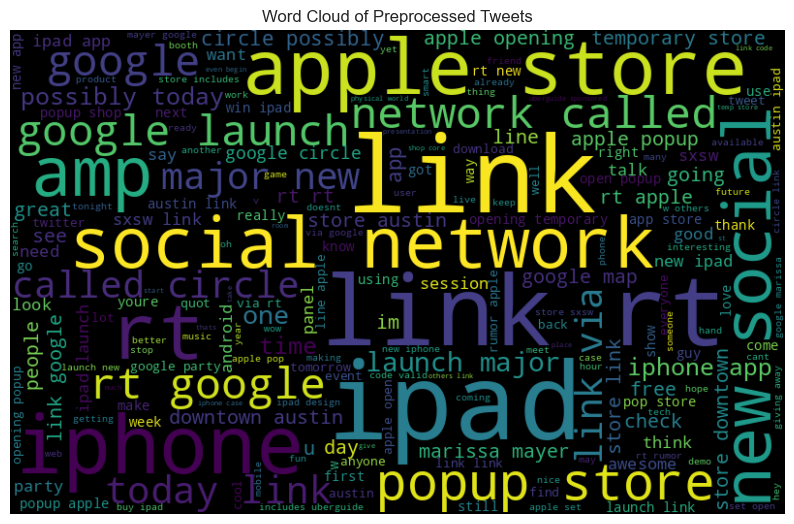

In [27]:
# 2. Word cloud of preprocessed text
all_words = ' '.join(df['preprocessed_text'])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud of Preprocessed Tweets')
plt.show()

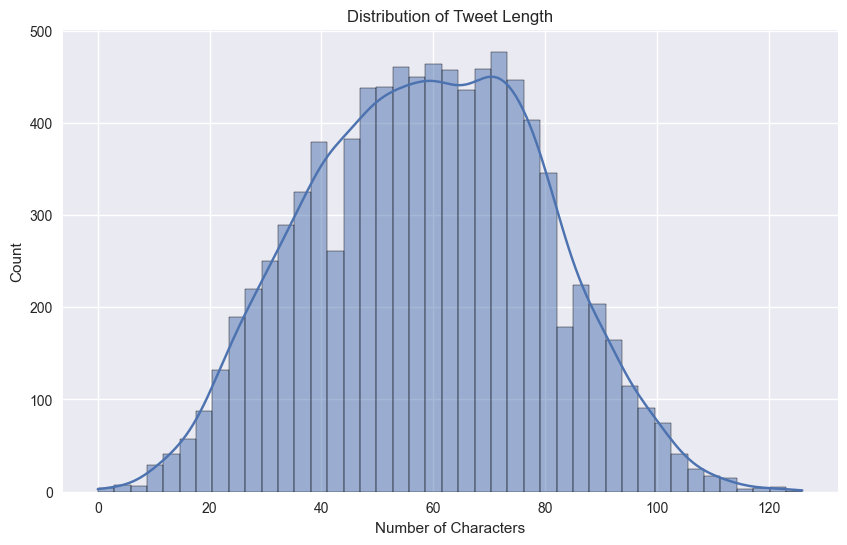

In [28]:
# 3. Distribution of tweet length
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], kde=True)
plt.title('Distribution of Tweet Length')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.show()


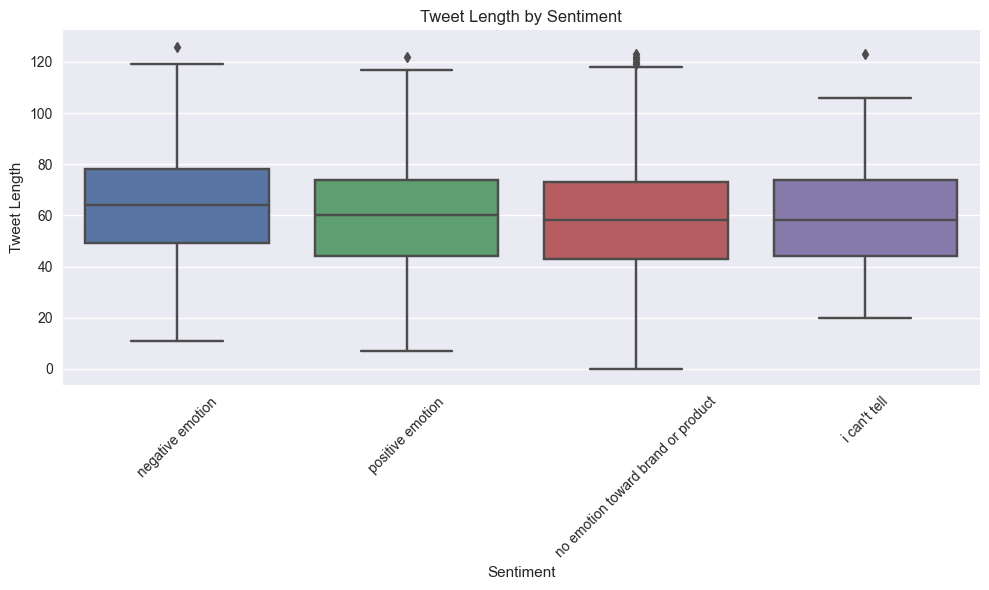

In [29]:
# 4. Box plot of tweet length by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_there_an_emotion_directed_at_a_brand_or_product', y='text_length', data=df)
plt.title('Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

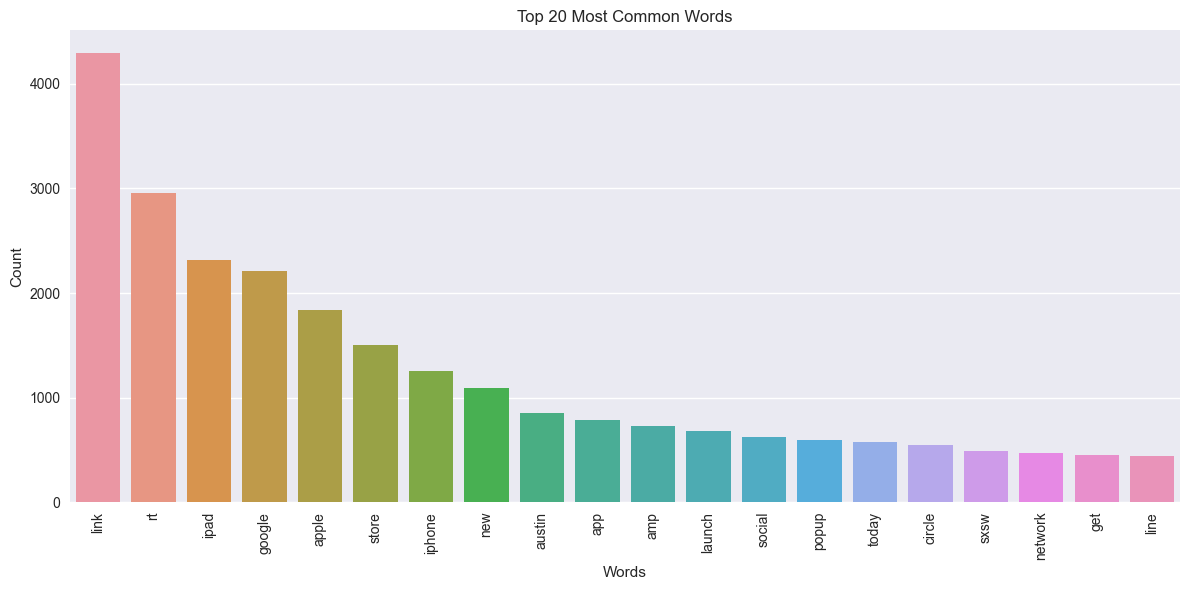

In [30]:
from collections import Counter

all_words = ' '.join(df['preprocessed_text']).split()
word_counts = Counter(all_words)
top_20 = dict(word_counts.most_common(20))

plt.figure(figsize=(12, 6))
sns.barplot(x=list(top_20.keys()), y=list(top_20.values()))
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [31]:
# Print some additional statistics
print("Total number of unique words:", len(set(all_words)))
print("\nTop 20 most common words:")
for word, count in top_20.items():
    print(f"{word}: {count}")

Total number of unique words: 8388

Top 20 most common words:
link: 4297
rt: 2959
ipad: 2311
google: 2207
apple: 1838
store: 1503
iphone: 1251
new: 1088
austin: 850
app: 789
amp: 724
launch: 681
social: 623
popup: 598
today: 573
circle: 543
sxsw: 493
network: 469
get: 454
line: 438


<Figure size 1200x600 with 0 Axes>

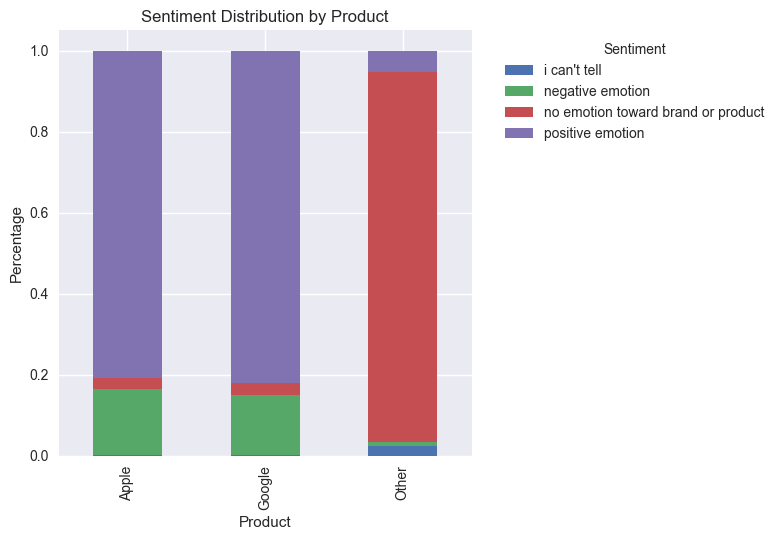

In [32]:
# Plot
plt.figure(figsize=(12, 6))
contingency_table_percent.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Percentage')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [33]:
# Print some statistics
print("Product distribution:")
print(df['Product'].value_counts())
print("\nContingency table (counts):")
print(contingency_table)
print("\nContingency table (percentages):")
print(contingency_table_percent)



Product distribution:
Product
Other     5802
Apple     2409
Google     882
Name: count, dtype: int64

Contingency table (counts):
is_there_an_emotion_directed_at_a_brand_or_product  i can't tell  \
Product                                                            
Apple                                                          7   
Google                                                         2   
Other                                                        147   

is_there_an_emotion_directed_at_a_brand_or_product  negative emotion  \
Product                                                                
Apple                                                            388   
Google                                                           131   
Other                                                             51   

is_there_an_emotion_directed_at_a_brand_or_product  no emotion toward brand or product  \
Product                                                                       

In [34]:
# Chi-square test of independence
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square statistic: {chi2}")
print(f"p-value: {p_value}")


Chi-square statistic: 7280.775206629543
p-value: 0.0


In [35]:
print("first few rows", df.head())
print("shape", df.shape)

first few rows                                           tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iphone   
1              ipad or iphone app   
2                            ipad   
3              ipad or iphone app   
4                          google   

  is_there_an_emotion_directed_at_a_brand_or_product  \
0                                   negative emotion   
1                                   positive emotion   
2                                   positive emotion   
3                                   negative emotion   
4                                   positive emotion   

                                        cleaned_text  \
0  i have a g iphone after hrs t

## MODELING ##

**ENCODING**

In [36]:
# Encode the target variable
le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['is_there_an_emotion_directed_at_a_brand_or_product'])

**FEATURE EXTRACTION**

In [37]:
# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('text_tfidf', TfidfVectorizer(max_features=5000), 'preprocessed_text'),
        ('product_onehot', OneHotEncoder(drop='first', sparse_output=False), ['Product'])
    ])


**DATA SPLITTING**

In [38]:
X = df[['preprocessed_text', 'Product', 'text_length']]
y = df['sentiment_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**PIPELINES**

In [39]:
pipelines = {
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', LogisticRegression(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    'SVM': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', SVC(kernel='rbf', random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('clf', GradientBoostingClassifier(n_estimators=100, random_state=42))
    ])
}

**TRAINING**

In [40]:
for name, pipeline in pipelines.items():
    print(f"\nTraining {name}...")
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Training Logistic Regression...

Logistic Regression Results:
Accuracy: 0.8791

Classification Report:
                                    precision    recall  f1-score   support

                      i can't tell       0.00      0.00      0.00        32
                  negative emotion       0.74      0.15      0.25       115
no emotion toward brand or product       0.91      0.98      0.94      1083
                  positive emotion       0.83      0.88      0.85       589

                          accuracy                           0.88      1819
                         macro avg       0.62      0.50      0.51      1819
                      weighted avg       0.86      0.88      0.85      1819


Confusion Matrix:
[[   0    0   31    1]
 [   0   17   11   87]
 [   0    2 1064   17]
 [   0    4   67  518]]

Training Random Forest...

Random Forest Results:
Accuracy: 0.8725

Classification Report:
                                    precision    recall  f1-score   support

    

In [41]:
# Compare model performances
models = ['Logistic Regression','Random Forest', 'SVM', 'Gradient Boosting']
accuracies = [
    classification_report(y_test, lr_pred, output_dict=True)['accuracy'],
    classification_report(y_test, svm_pred, output_dict=True)['accuracy'],
    classification_report(y_test, lstm_pred, output_dict=True)['accuracy']
]

plt.figure(figsize=(10,6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.show()


NameError: name 'lr_pred' is not defined

**FEATURE IMPORTANCE**

In [201]:
for name in ['Logistic Regression', 'Random Forest']:
    if name == 'Logistic Regression':
        feature_importance = pipelines[name].named_steps['clf'].coef_[0]
    else:
        feature_importance = pipelines[name].named_steps['clf'].feature_importances_
    
    feature_names = (pipelines[name].named_steps['preprocessor']
                     .named_transformers_['text_tfidf']
                     .get_feature_names_out())
    
    # Add other feature names
    feature_names = np.concatenate([
        feature_names,
        pipelines[name].named_steps['preprocessor'].named_transformers_['product_onehot'].get_feature_names_out(['Product']),
        ['text_length']
    ])
    
    # Get top 20 features
    top_features = sorted(zip(feature_importance, feature_names), key=lambda x: abs(x[0]), reverse=True)[:20]
    
    print(f"\nTop 20 features for {name}:")
    for importance, feature in top_features:
        print(f"{feature}: {importance:.4f}")


Top 20 features for Logistic Regression:
Product_Other: 1.8692
nut: 1.3406
go: 1.2071
en: 0.9580
amp: -0.9418
rt: -0.8707
new: -0.8512
link: -0.8118
give: 0.8028
fragmentationgtgoogle: 0.7863
rww: 0.7780
panelist: 0.7750
think: 0.7690
fast: 0.7646
home: 0.7563
gave: 0.7456
major: -0.7441
equal: 0.7349
free: -0.7321
fight: 0.7139

Top 20 features for Random Forest:
Product_Other: 0.3156
Product_Google: 0.0534
link: 0.0141
ipad: 0.0139
google: 0.0075
rt: 0.0073
apple: 0.0070
iphone: 0.0068
app: 0.0056
store: 0.0055
cool: 0.0050
new: 0.0037
awesome: 0.0035
austin: 0.0034
smart: 0.0030
amp: 0.0029
launch: 0.0028
even: 0.0027
like: 0.0027
circle: 0.0027


In [203]:

# # Vectorize the text
# vectorizer = CountVectorizer(stop_words='english', max_features=5000)
# X_train_vec = vectorizer.fit_transform(X_train)
# X_test_vec = vectorizer.transform(X_test)

# # Train the model
# model = MultinomialNB()
# model.fit(X_train_vec, y_train)

# # Make predictions
# y_pred = model.predict(X_test_vec)

# # Evaluate the model
# print(classification_report(y_test, y_pred))

# # Plot confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(10,7))
# sns.heatmap(cm, annot=True, fmt='d')
# plt.title('Confusion Matrix')
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()


## ADVANCED PREPROCESSING ##

In [205]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import numpy as np

# # Deep Learning Model (LSTM)
# max_features = 5000
# tokenizer = Tokenizer(num_words=max_features, split=' ')
# tokenizer.fit_on_texts(X_train)

# X_train_seq = tokenizer.texts_to_sequences(X_train)
# X_test_seq = tokenizer.texts_to_sequences(X_test)

# max_len = 100
# X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
# X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# model = Sequential()
# model.add(Embedding(max_features, 128, input_shape=(max_len,)))
# model.add(SpatialDropout1D(0.4))
# model.add(LSTM(196, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(len(np.unique(y_train)), activation='softmax'))
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# print(model.summary())

# history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=1)

# # Evaluate LSTM model
# lstm_pred = model.predict(X_test_pad)
# lstm_pred = np.argmax(lstm_pred, axis=1)
# print("LSTM Results:")
# print(classification_report(y_test, lstm_pred))

In [206]:
# # Evaluate LSTM model
# lstm_pred = model.predict(X_test_pad)
# lstm_pred = np.argmax(lstm_pred, axis=1)
# print("LSTM Results:")
# print(classification_report(y_test, lstm_pred))

In [207]:
# # Visualize training history
# plt.figure(figsize=(12,6))
# plt.subplot(121)
# plt.plot(history.history['accuracy'], label='train')
# plt.plot(history.history['val_accuracy'], label='validation')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.subplot(122)
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='validation')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()